# HEART DISEASE Classification      ~ ratik arora  

The target for this project is to get the ***accuracy upto 95%*** to have the best classification on heart disease patients

In [ ]:
# from google.colab import files


# uploaded = files.upload()

1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import  train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [ ]:
df = pd.read_csv("heart-disease.csv")
print(df.shape)

(303, 14)


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<Axes: xlabel='target'>

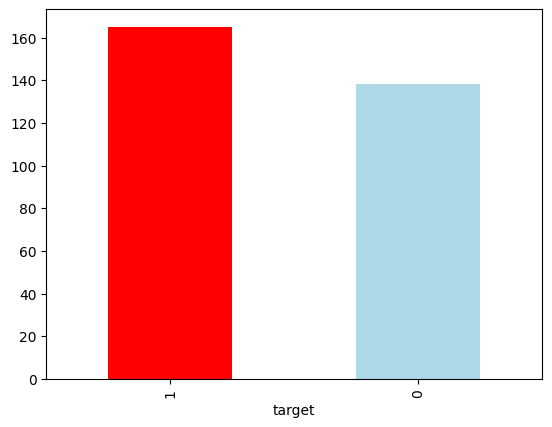

In [ ]:
df['target'].value_counts().plot(kind="bar",color=["red","lightblue"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

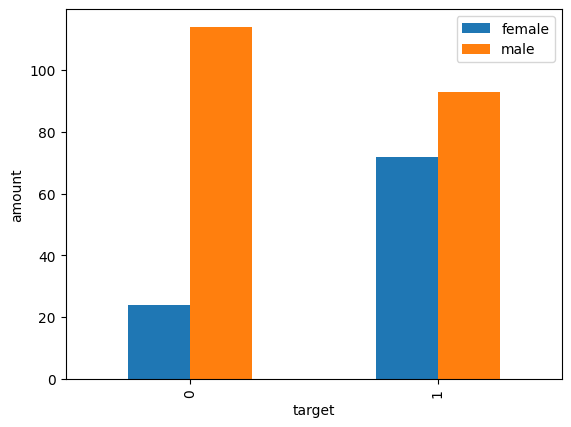

In [ ]:
pd.crosstab(df.target,df.sex).plot(kind="bar")
plt.xlabel("target")
plt.ylabel("amount")
plt.legend(["female","male"])

In [ ]:
df["thalach"]

0      150
1      187
2      172
3      178
4      163
      ... 
298    123
299    132
300    141
301    115
302    174
Name: thalach, Length: 303, dtype: int64

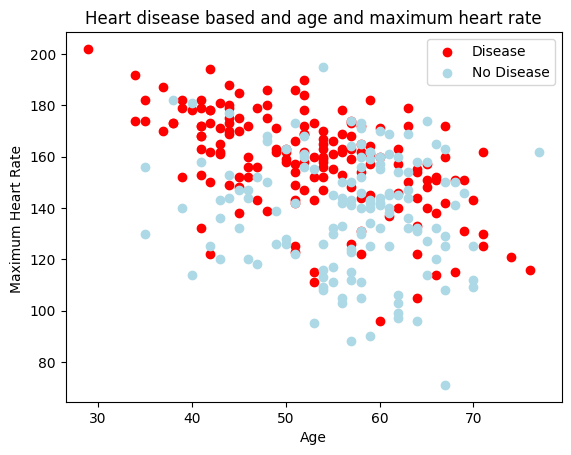

In [ ]:
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c="red")
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c = "lightblue")

plt.title("Heart disease based and age and maximum heart rate")
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate ")
plt.legend(["Disease","No Disease"])

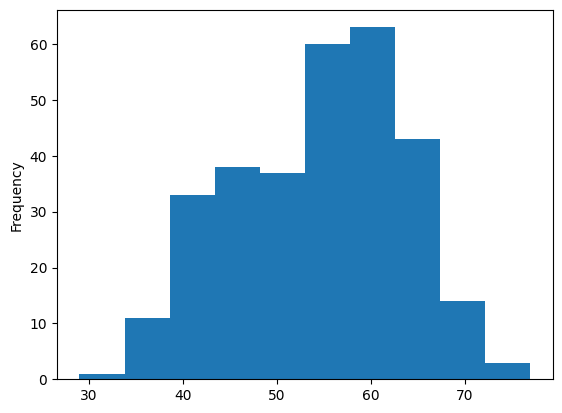

In [ ]:
df.age.plot.hist();

In [ ]:
# chest pain it has 4 values
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


<Axes: xlabel='cp'>

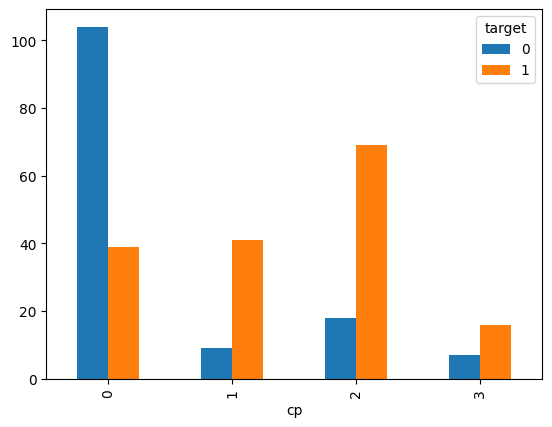

In [ ]:
pd.crosstab(df.cp,df.target).plot(kind="bar")

Text(0.5, 1.0, 'Correlation matrix between all features and target')

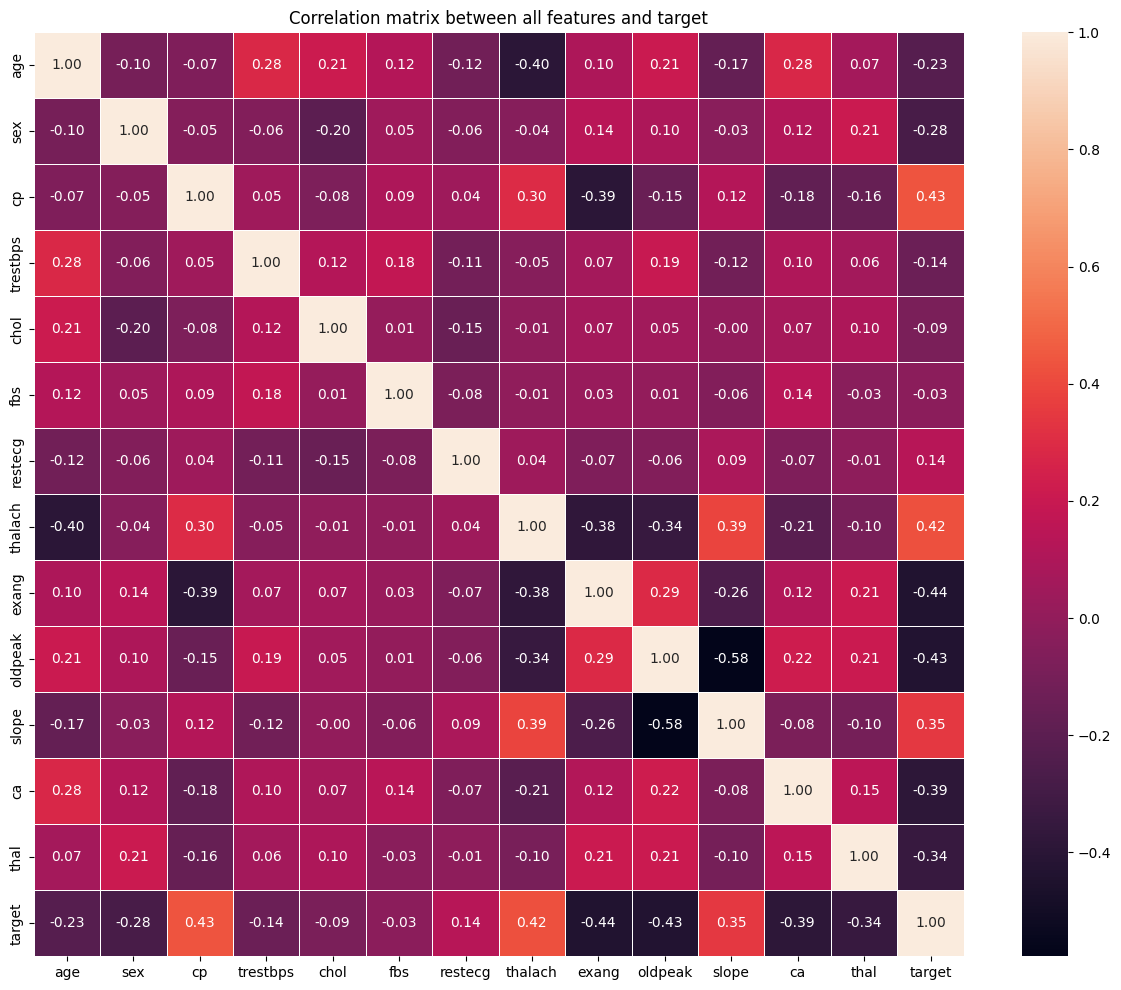

In [ ]:
corrmatrix = df.corr()
plt.figure(figsize=(15, 12))
sb.heatmap(corrmatrix,annot=True,linewidths=0.5,fmt=".2f")
plt.title("Correlation matrix between all features and target")

Splitting the data

In [ ]:
x = df.drop(['target'],axis=1)
y = df['target']
np.random.seed(42)
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)
xtrain,ytrain

(     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 132   42    1   1       120   295    0        1      162      0      0.0   
 202   58    1   0       150   270    0        0      111      1      0.8   
 196   46    1   2       150   231    0        1      147      0      3.6   
 75    55    0   1       135   250    0        0      161      0      1.4   
 176   60    1   0       117   230    1        1      160      1      1.4   
 ..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
 188   50    1   2       140   233    0        1      163      0      0.6   
 71    51    1   2        94   227    0        1      154      1      0.0   
 106   69    1   3       160   234    1        0      131      0      0.1   
 270   46    1   0       120   249    0        0      144      0      0.8   
 102   63    0   1       140   195    0        1      179      0      0.0   
 
      slope  ca  thal  
 132      2   0     2  
 202      2   0     3  
 1

Modelling using 3 models for now

1.   Logistic Regresssion
2.   K nearest neighbours
3.   Random Forest Classifier  



strarting with ***Logistic Regression***

In [ ]:

clf = LogisticRegression(max_iter=1000)
clf.fit(xtrain,ytrain)
ypred = clf.predict(xtest)

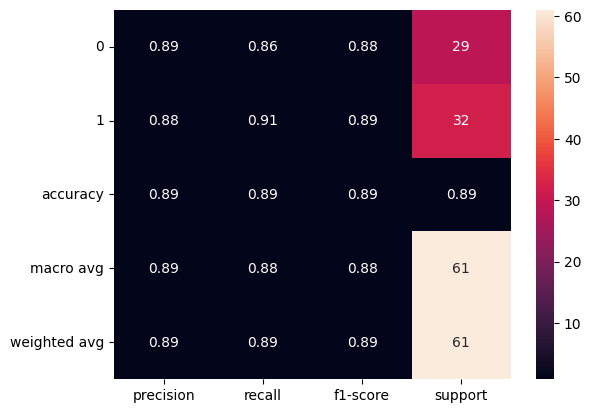

In [ ]:
report = classification_report(ytest, ypred, output_dict=True)

df = pd.DataFrame(report).transpose()

sb.heatmap(df, annot=True)
plt.show()


In [ ]:
accuracy_score(ytest,ypred)


0.8852459016393442

In [ ]:
clf.score(xtest, ytest)

0.8852459016393442

In [ ]:
cvs = cross_val_score(clf,X=x,y=y,cv =5)
print(cvs)

[0.80327869 0.86885246 0.85245902 0.86666667 0.75      ]


In [ ]:
print(np.mean(cvs))

0.8282513661202187


### Naah this isnt fun lets do all at once XD

In [ ]:
models = {
    'Logistic Regression' : LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'K Neighbors Classifier': KNeighborsClassifier(n_neighbors=11)
}

def fit_and_score(models,xtrain,ytrain,xtest,ytest):
    model_score = {}

    for name,model in models.items():
        # print(name,model)
        model = model.fit(xtrain,ytrain)
        model_score[name] = model.score(xtest,ytest)

    return model_score

In [ ]:
model_score = fit_and_score(models,xtrain,ytrain,xtest,ytest)
model_score

{'Logistic Regression': 0.8852459016393442,
 'Random Forest': 0.8524590163934426,
 'K Neighbors Classifier': 0.7540983606557377}

<Axes: >

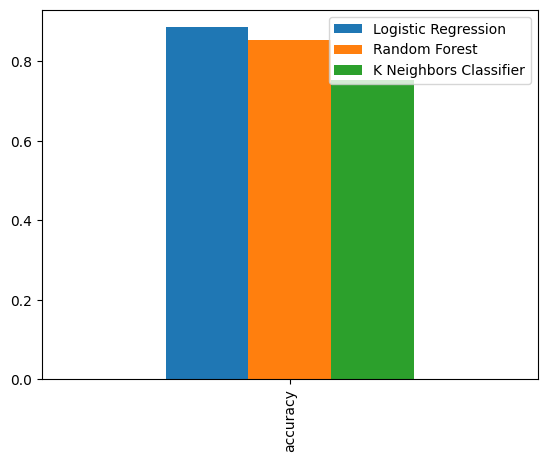

In [ ]:
model_compare = pd.DataFrame(model_score,index=["accuracy"])
model_compare.plot.bar()


In [ ]:
def improving_knn(xtrain,ytrain,xtest,ytest):
    train_score = []
    test_score = []
    np.random.seed(42)
    for i in range(1,26):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(xtrain,ytrain)
        train_score.append(knn.score(xtrain,ytrain))
        test_score.append(knn.score(xtest,ytest))

    return train_score,test_score


train_score,test_score = improving_knn(xtrain,ytrain,xtest,ytest)
# print(len(test_score))
overall = []
for i in range(0,25):
    overall.append([test_score[i],train_score[i],i+1])

overall.sort(reverse=True)
overall[:3]

[[0.7540983606557377, 0.7272727272727273, 11],
 [0.7377049180327869, 0.6983471074380165, 12],
 [0.7377049180327869, 0.6942148760330579, 14]]

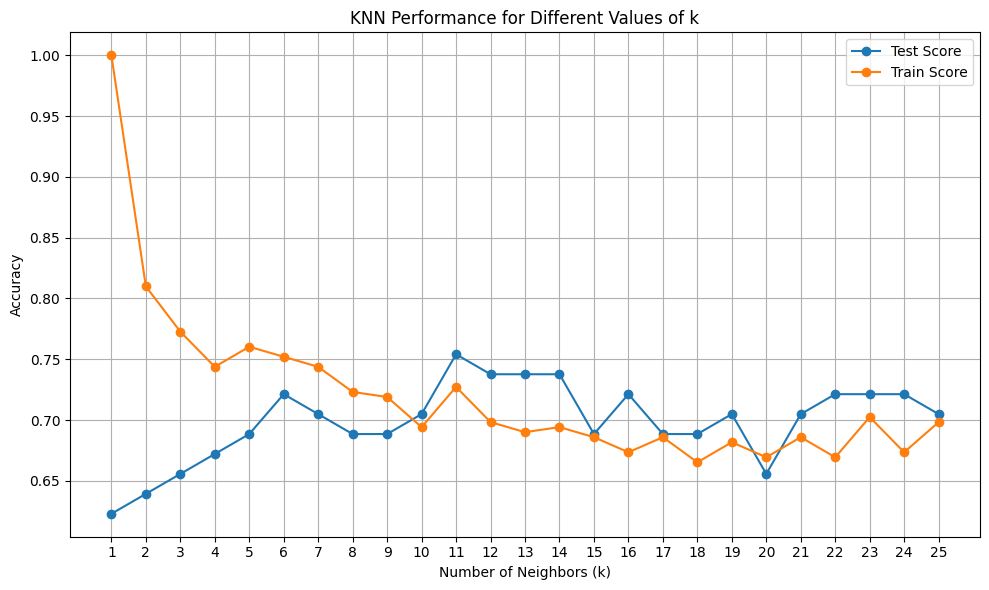

In [ ]:
# made this graph using chatgpt
k_values = list(range(1, 26))
plt.figure(figsize=(10, 6))
plt.plot(k_values, test_score, marker='o', label='Test Score')
plt.plot(k_values, train_score, marker='o', label='Train Score')
plt.title('KNN Performance for Different Values of k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.xticks(k_values)
plt.tight_layout()
plt.show()

### So KNN best test score accuracy reaches at **n_neighbours = 11,**
# knn test score : **0.7540983606557377**,
### train score : **0.7272727272727273**

therefore we select the best KNN score at 75.4 percent and move along our way to hyperparameter tune other models

In [ ]:
param_grid = {
    'n_estimators': [i for i in range(100,500,100)],
    'max_depth': [None, 10, 20,30],
    'min_samples_split': [2, 5, 10,20],
    'min_samples_leaf': [1, 2, 4,8]
}

rf_classifier = RandomForestClassifier()

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5,verbose=True)

grid_search.fit(xtrain, ytrain)


Fitting 5 folds for each of 256 candidates, totalling 1280 fits


KeyboardInterrupt: 

In [ ]:
print("Best Parameters:", grid_search.best_params_)
print("Score:", grid_search.score(xtest,ytest))

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 8, 'min_samples_split': 10, 'n_estimators': 100}
Best Score: 0.8688524590163934

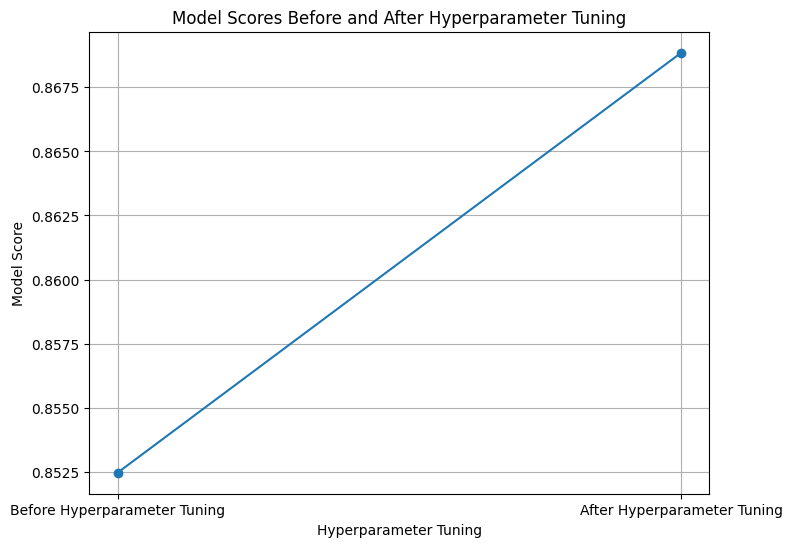

In [ ]:
after_score = 0.8688524590163934
previous_score = model_score["Random Forest"]
# after_score = grid_search.best_score_

parameters = ["Before Hyperparameter Tuning", "After Hyperparameter Tuning"]
scores = [previous_score, after_score]

plt.figure(figsize=(8, 6))
plt.plot(parameters, scores, marker='o')
plt.title("Model Scores Before and After Hyperparameter Tuning")
plt.xlabel("Hyperparameter Tuning")
plt.ylabel("Model Score")
plt.grid(True)
plt.show()

## So using hyper parameter on Random Forest the Score has tend to remain the same
## Therefore we neglect the Random Forest as well


Last option to tune Logistic REgresstion for this data set and get as high result as possible

In [ ]:
param_grid = {
    'C': np.logspace(-4,4,1000),
    'solver' : ['liblinear'],
    'penalty': ['l1', 'l2']
}

lr = LogisticRegression()

grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, verbose=True)

grid_search.fit(xtrain, ytrain)

Fitting 5 folds for each of 2000 candidates, totalling 10000 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.01861017e-04, 1.03756668e-04, 1.05687597e-04,
       1.07654461e-04, 1.09657929e-04, 1.11698682e-04, 1.13777413e-04,
       1.15894830e-04, 1.18051653e-04, 1.20248614e-04, 1.22486461e-04,
       1.24765955e-04, 1.27087871e-04, 1.29452998e-04, 1.31862140e-04,
       1.34316117e-04, 1.36815763e-04, 1.393619...
       7.04446228e+03, 7.17556092e+03, 7.30909933e+03, 7.44512291e+03,
       7.58367791e+03, 7.72481145e+03, 7.86857151e+03, 8.01500696e+03,
       8.16416760e+03, 8.31610415e+03, 8.47086827e+03, 8.62851257e+03,
       8.78909065e+03, 8.95265713e+03, 9.11926760e+03, 9.28897872e+03,
       9.46184819e+03, 9.63793480e+03, 9.81729841e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             verbose=True)

In [ ]:
grid_search.best_params_

{'C': 0.19920457084538692, 'penalty': 'l2', 'solver': 'liblinear'}

In [ ]:
after_scorelr = grid_search.score(xtest,ytest)
after_scorelr

0.8852459016393442

In [ ]:
previous_scorelr = model_score["Logistic Regression"]
previous_scorelr

0.8852459016393442

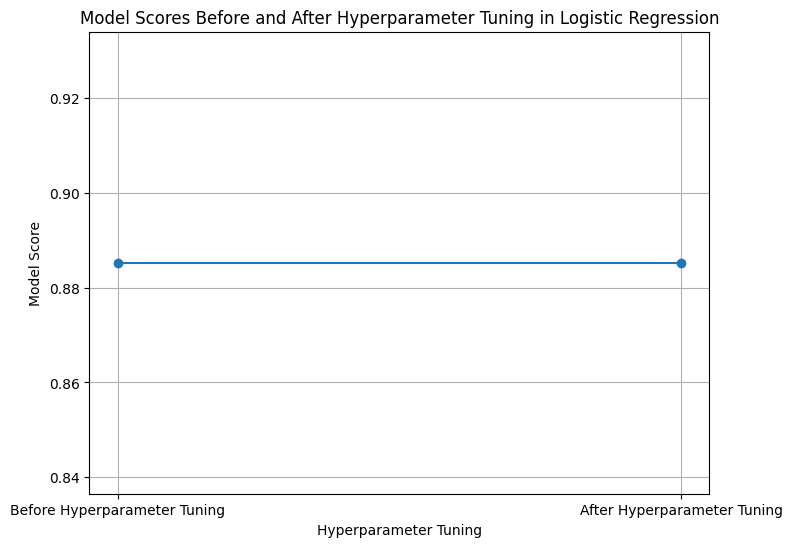

In [ ]:
parameters = ["Before Hyperparameter Tuning", "After Hyperparameter Tuning"]
scores = [previous_scorelr, after_scorelr]

plt.figure(figsize=(8, 6))
plt.plot(parameters, scores, marker='o')
plt.title("Model Scores Before and After Hyperparameter Tuning in Logistic Regression")
plt.xlabel("Hyperparameter Tuning")
plt.ylabel("Model Score")
plt.grid(True)
plt.show()

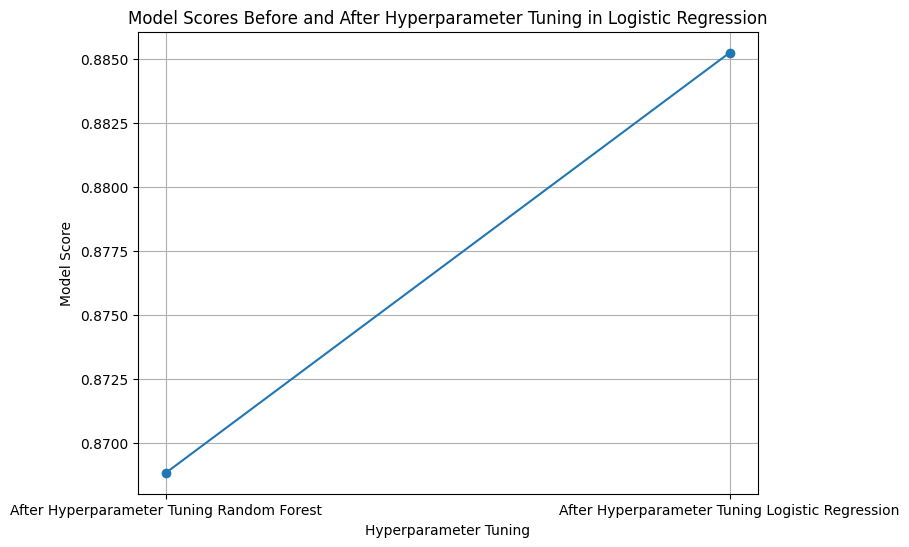

In [ ]:
parameters = ["After Hyperparameter Tuning Random Forest", "After Hyperparameter Tuning Logistic Regression"]
scores = [after_score, after_scorelr]

plt.figure(figsize=(8, 6))
plt.plot(parameters, scores, marker='o')
plt.title("Model Scores Before and After Hyperparameter Tuning in Logistic Regression")
plt.xlabel("Hyperparameter Tuning")
plt.ylabel("Model Score")
plt.grid(True)
plt.show()

In [ ]:
ypred = grid_search.predict(xtest)
ypred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
ytest

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [ ]:
cf = confusion_matrix(ytest,ypred)
cf

array([[25,  4],
       [ 3, 29]])

<Axes: >

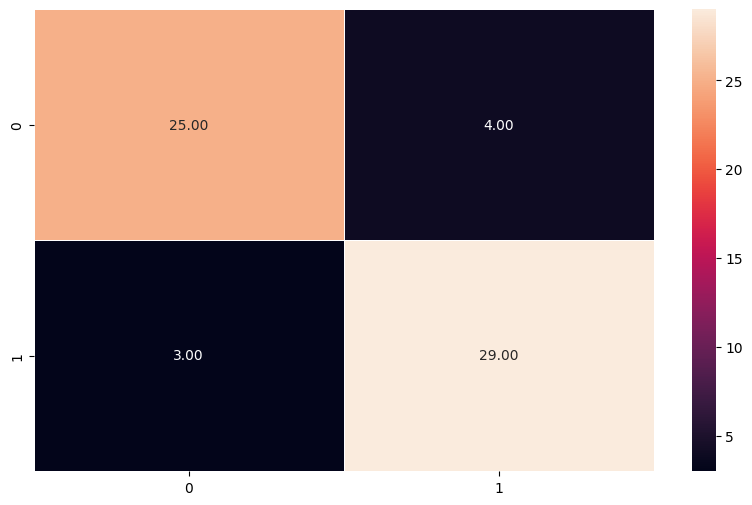

In [ ]:
plt.figure(figsize=(10, 6))
sb.heatmap(cf,annot=True,linewidths=0.5,fmt=".2f")

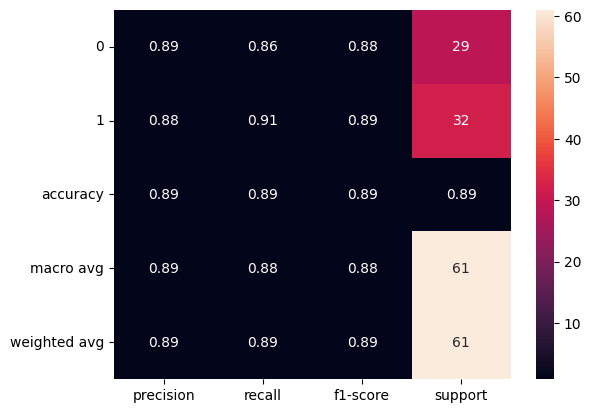

In [ ]:
report = classification_report(ytest, ypred, output_dict=True)

df = pd.DataFrame(report).transpose()

sb.heatmap(df, annot=True)
plt.show()

# now calulating using cross evaluation



In [ ]:
grid_search.best_params_

{'C': 0.19920457084538692, 'penalty': 'l2', 'solver': 'liblinear'}

In [ ]:
model = LogisticRegression(C=0.19920457084538692,penalty ='l2', solver = 'liblinear')

# Accuracy

In [ ]:
cv_acc = cross_val_score(model,x,y,cv=5,scoring="accuracy")
print(cv_acc)
print(np.mean(cv_acc))

[0.81967213 0.90163934 0.86885246 0.88333333 0.75      ]
0.8446994535519124


# Precision

In [ ]:
cv_pre = cross_val_score(model,x,y,cv=5,scoring="precision")
print(cv_pre)
print(np.mean(cv_pre))

[0.775      0.88571429 0.85714286 0.86111111 0.725     ]
0.8207936507936507


# Recall

In [ ]:
cv_recall = cross_val_score(model,x,y,cv=5,scoring="recall")
print(cv_recall)
print(np.mean(cv_recall))

[0.93939394 0.93939394 0.90909091 0.93939394 0.87878788]
0.9212121212121213


# F1 Score

In [ ]:
cv_f1 = cross_val_score(model,x,y,cv=5,scoring="f1")
print(cv_f1)
print(np.mean(cv_f1))

[0.84931507 0.91176471 0.88235294 0.89855072 0.79452055]
0.8673007976269721


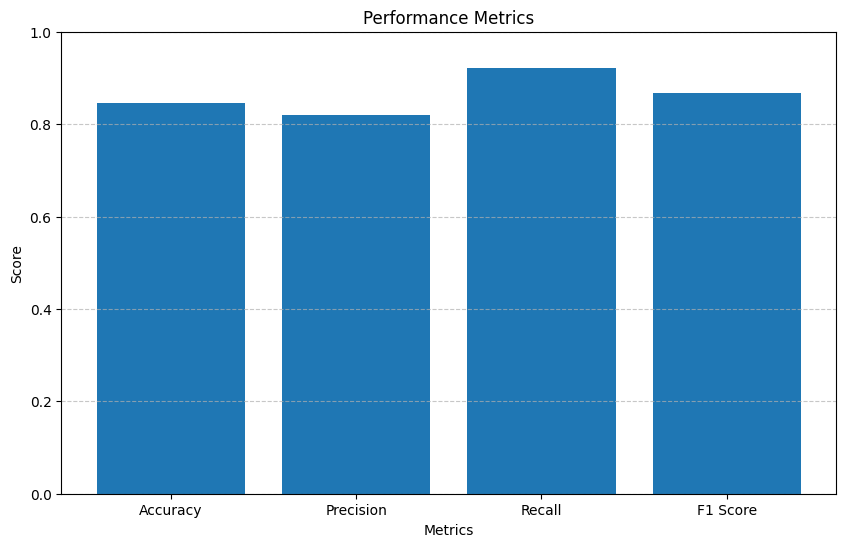

In [ ]:
# Define the metrics and their corresponding values
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [np.mean(cv_acc), np.mean(cv_pre), np.mean(cv_recall), np.mean(cv_f1)]  # Assuming these are single values for each metric

# Plotting the metrics
plt.figure(figsize=(10, 6))
plt.bar(metrics, values)
plt.title('Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set the y-axis limit to better visualize the differences in scores
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Conclusion
### I wasnt able to cross or even get near to the set threshold for the 95% accuracy therefore i give up on this dataset, one day i might try again to get back onto it, if we are able to find dataset with more records and more paramerters.

In [108]:
# till then
print("Hello World")

Hello World
